### Importing the necessary libraries -

In [479]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import rcParams
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error, root_mean_squared_error, accuracy_score, confusion_matrix
from scipy import stats

import warnings
warnings.filterwarnings('ignore')

sns.set()
sns.set_style("white")
%matplotlib inline
rcParams['figure.figsize'] = [20,10]

### Loading the dataset -

In [480]:
df = pd.read_csv(r'datasets\bright_automotive_company.csv')

In [481]:
df.head()

,Age,Gender,Profession,Marital_status,Education,No_of_Dependents,Personal_loan,House_loan,Partner_working,Salary,Partner_salary,Total_salary,Price,Make
0,53,Male,Business,Married,Post Graduate,4,No,No,Yes,99300.0,70700.0,170000,61000,SUV
1,53,Femal,Salaried,Married,Post Graduate,4,Yes,No,Yes,95500.0,70300.0,165800,61000,SUV
2,53,Female,Salaried,Married,Post Graduate,3,No,No,Yes,97300.0,60700.0,158000,57000,SUV
3,53,Female,Salaried,Married,Graduate,?,Yes,No,Yes,72500.0,70300.0,142800,61000,?
4,53,Male,NaN,Married,Post Graduate,3,No,No,Yes,79700.0,60200.0,139900,57000,SUV


### Information about the dataset attributes and memory usage -

In [482]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1581 entries, 0 to 1580
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Age               1581 non-null   int64  
 1   Gender            1528 non-null   object 
 2   Profession        1575 non-null   object 
 3   Marital_status    1581 non-null   object 
 4   Education         1581 non-null   object 
 5   No_of_Dependents  1581 non-null   object 
 6   Personal_loan     1581 non-null   object 
 7   House_loan        1581 non-null   object 
 8   Partner_working   1581 non-null   object 
 9   Salary            1568 non-null   float64
 10  Partner_salary    1475 non-null   float64
 11  Total_salary      1581 non-null   int64  
 12  Price             1581 non-null   int64  
 13  Make              1581 non-null   object 
dtypes: float64(2), int64(3), object(9)
memory usage: 173.1+ KB


### Statistical description -

In [483]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,1581.0,31.952562,8.712549,14.0,25.0,29.0,38.0,120.0
Salary,1568.0,60276.913265,14636.200199,30000.0,51900.0,59450.0,71700.0,99300.0
Partner_salary,1475.0,20225.559322,19573.149277,0.0,0.0,25600.0,38300.0,80500.0
Total_salary,1581.0,79625.996205,25545.857768,30000.0,60500.0,78000.0,95900.0,171000.0
Price,1581.0,35948.170778,21175.212108,58.0,25000.0,31000.0,47000.0,680000.0


#### No. of Unique Values in each column -

In [484]:
unique_values = df.nunique()
display(unique_values.sort_values(ascending=False).to_frame(name='Unique Values'))

,Unique Values
Total_salary,754
Salary,535
Partner_salary,149
Price,55
Age,35
No_of_Dependents,6
Gender,4
Make,4
Profession,2
Marital_status,2


### Dimensions of the data -

In [485]:
print((df.shape),'\n')
print("Shape of bright_automotive_company.csv: ", df.shape)

(1581, 14) 

Shape of bright_automotive_company.csv:  (1581, 14)


In [486]:
df.columns

Index(['Age', 'Gender', 'Profession', 'Marital_status', 'Education',
       'No_of_Dependents', 'Personal_loan', 'House_loan', 'Partner_working',
       'Salary', 'Partner_salary', 'Total_salary', 'Price', 'Make'],
      dtype='object')

# EDA -

## Data Cleaning -
### a. Check for Missing Values
### b. Handle Missing Values
### c. Remove Duplicates

### Converting No_of_Dependents to Integer and removing '?' placeholders -

In [487]:
# Converts all values to int and places NaNs in place of '?'
df['No_of_Dependents'] = pd.to_numeric(df['No_of_Dependents'], errors='coerce')

### Correcting the Mislabeled classes in Gender -

In [488]:
df['Gender'] = ['Female' if i in {'Femle', 'Femal'} else i for i in df['Gender']]

In [489]:
missing_values = df.isnull().sum()
display(missing_values[missing_values>0].sort_values(ascending=False).to_frame(name='Missing Values'))

,Missing Values
Partner_salary,106
Gender,53
Salary,13
Profession,6
No_of_Dependents,2


In [490]:
num_cols = df.select_dtypes(include=np.number).columns
df[num_cols] = df[num_cols].fillna(df[num_cols].median())

cat_cols = df.select_dtypes(include='object').columns
df[cat_cols] = df[cat_cols].fillna(df[cat_cols].mode().iloc[0])

In [491]:
df.isnull().sum()

Age                 0
Gender              0
Profession          0
Marital_status      0
Education           0
No_of_Dependents    0
Personal_loan       0
House_loan          0
Partner_working     0
Salary              0
Partner_salary      0
Total_salary        0
Price               0
Make                0
dtype: int64

In [492]:
df = df.drop_duplicates()

In [493]:
df.dtypes

Age                   int64
Gender               object
Profession           object
Marital_status       object
Education            object
No_of_Dependents    float64
Personal_loan        object
House_loan           object
Partner_working      object
Salary              float64
Partner_salary      float64
Total_salary          int64
Price                 int64
Make                 object
dtype: object

### Checking for duplicate rows -

In [494]:
duplicates = df[df.duplicated()]

In [495]:
duplicates

,Age,Gender,Profession,Marital_status,Education,No_of_Dependents,Personal_loan,House_loan,Partner_working,Salary,Partner_salary,Total_salary,Price,Make


### Univariate Analysis -

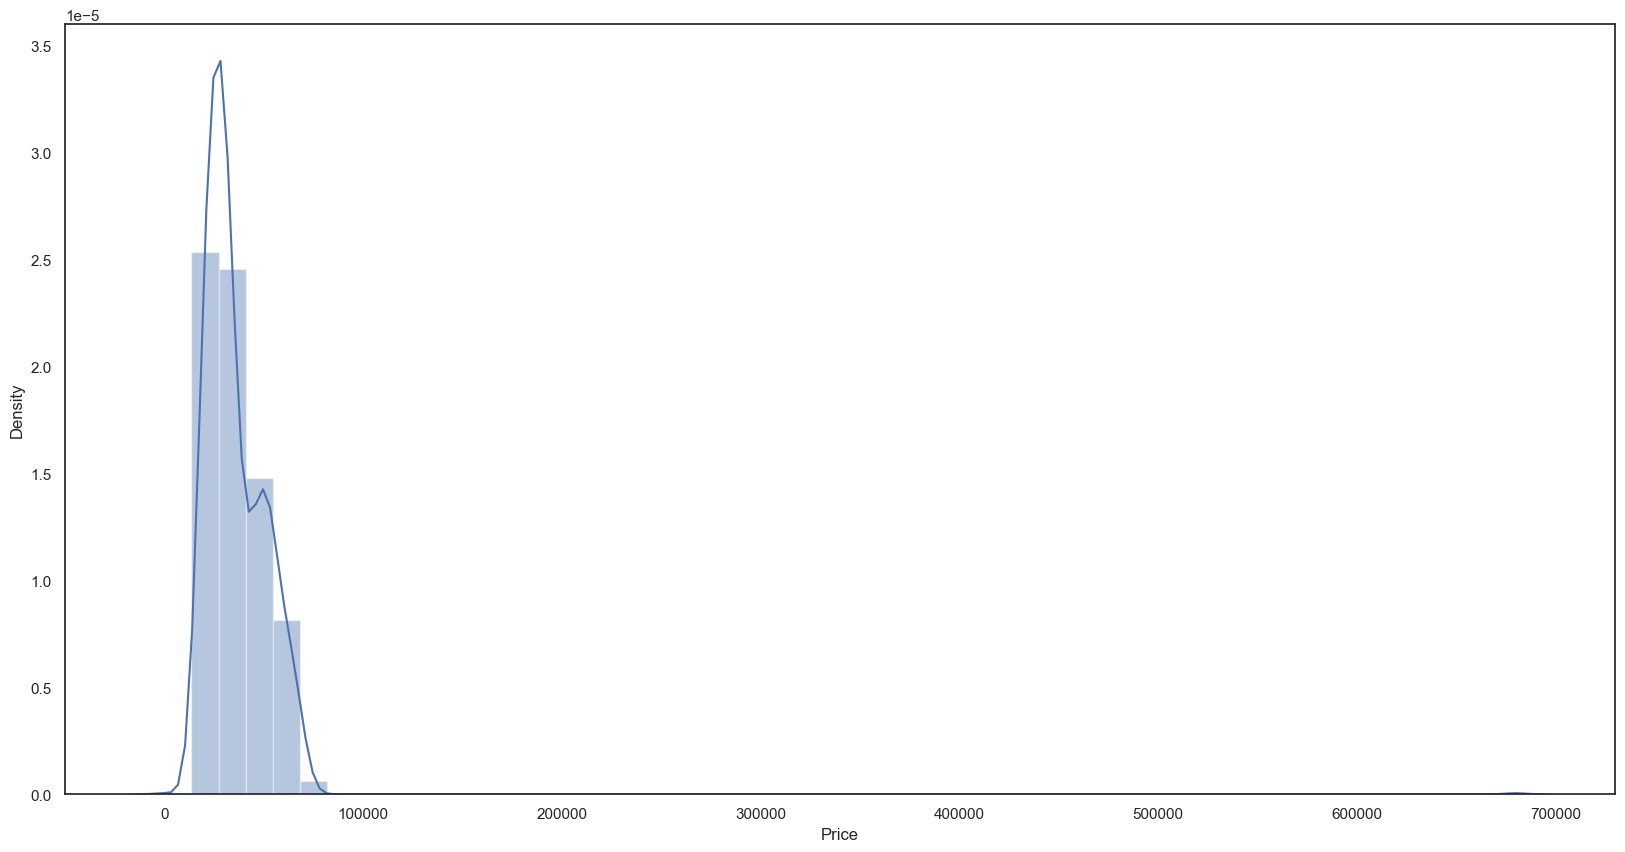

In [496]:
sns.distplot(df['Price'],kde = True)
plt.show()

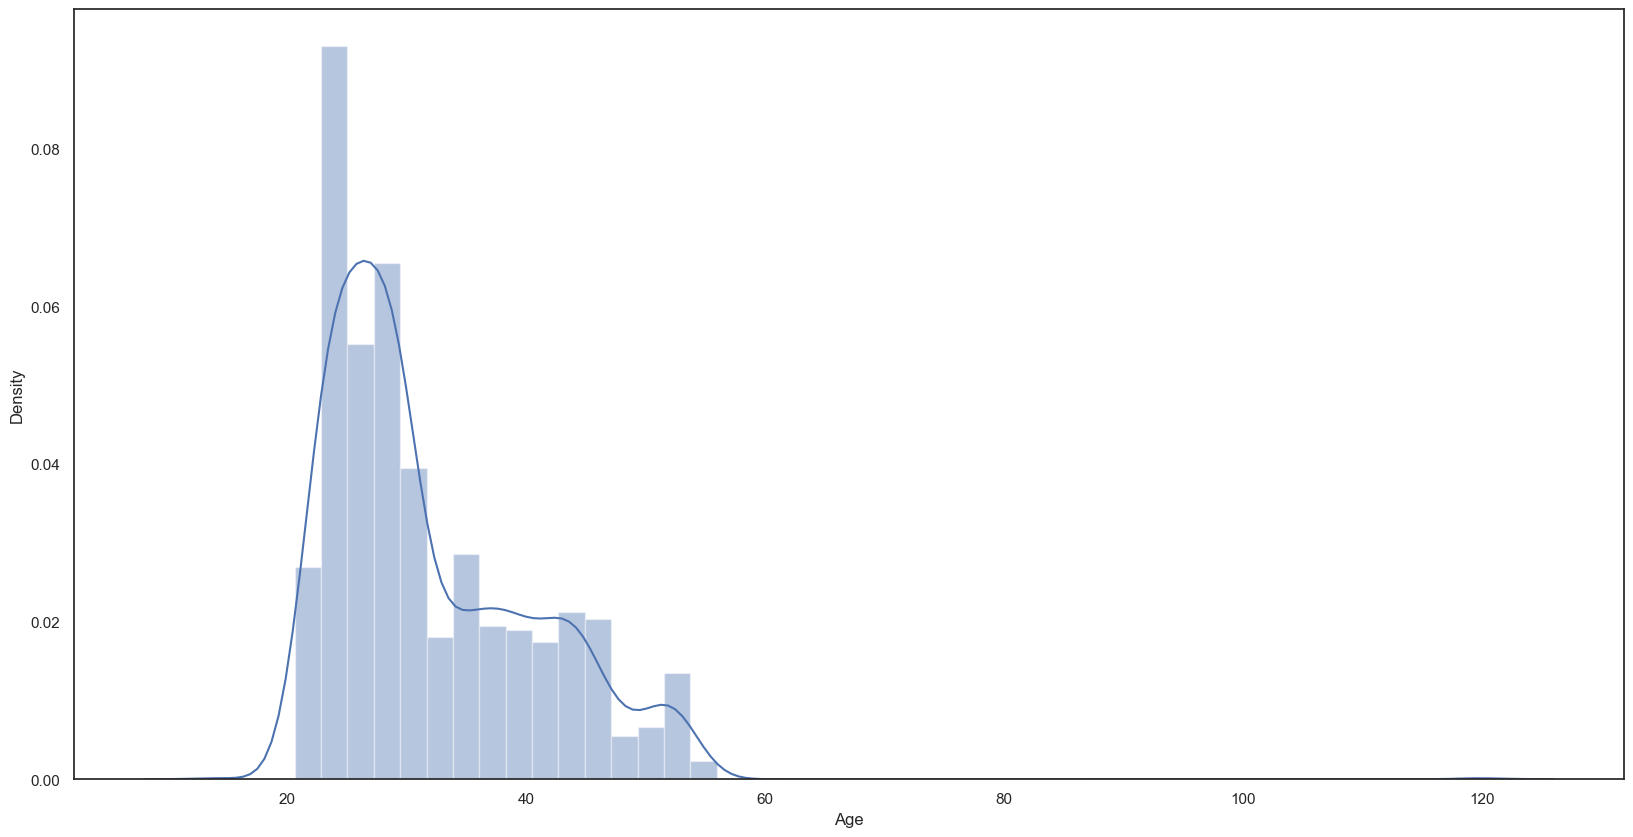

In [497]:
sns.distplot(df['Age'], kde = True)
plt.show()

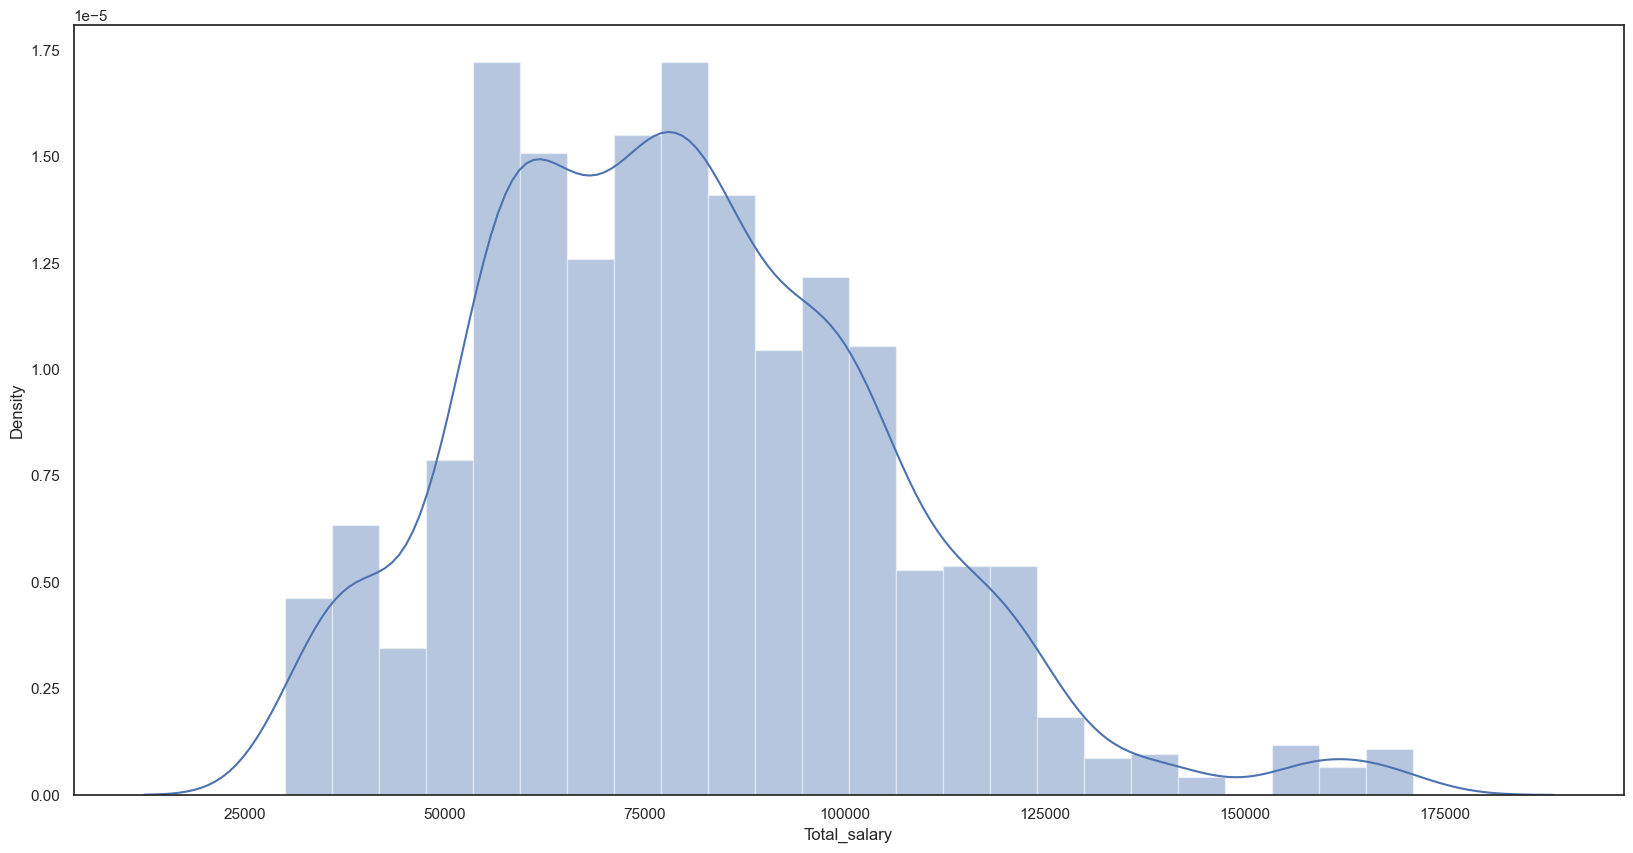

In [498]:
sns.distplot(df['Total_salary'], kde = True)
plt.show()

### Encoding the data

In [499]:
encoder = LabelEncoder()
for col in cat_cols:
        df[col] = encoder.fit_transform(df[col])

In [500]:
types = df.dtypes
display(types.to_frame(name='Data Types'))

,Data Types
Age,int64
Gender,int64
Profession,int64
Marital_status,int64
Education,int64
No_of_Dependents,float64
Personal_loan,int64
House_loan,int64
Partner_working,int64
Salary,float64


### Checking for outliers -

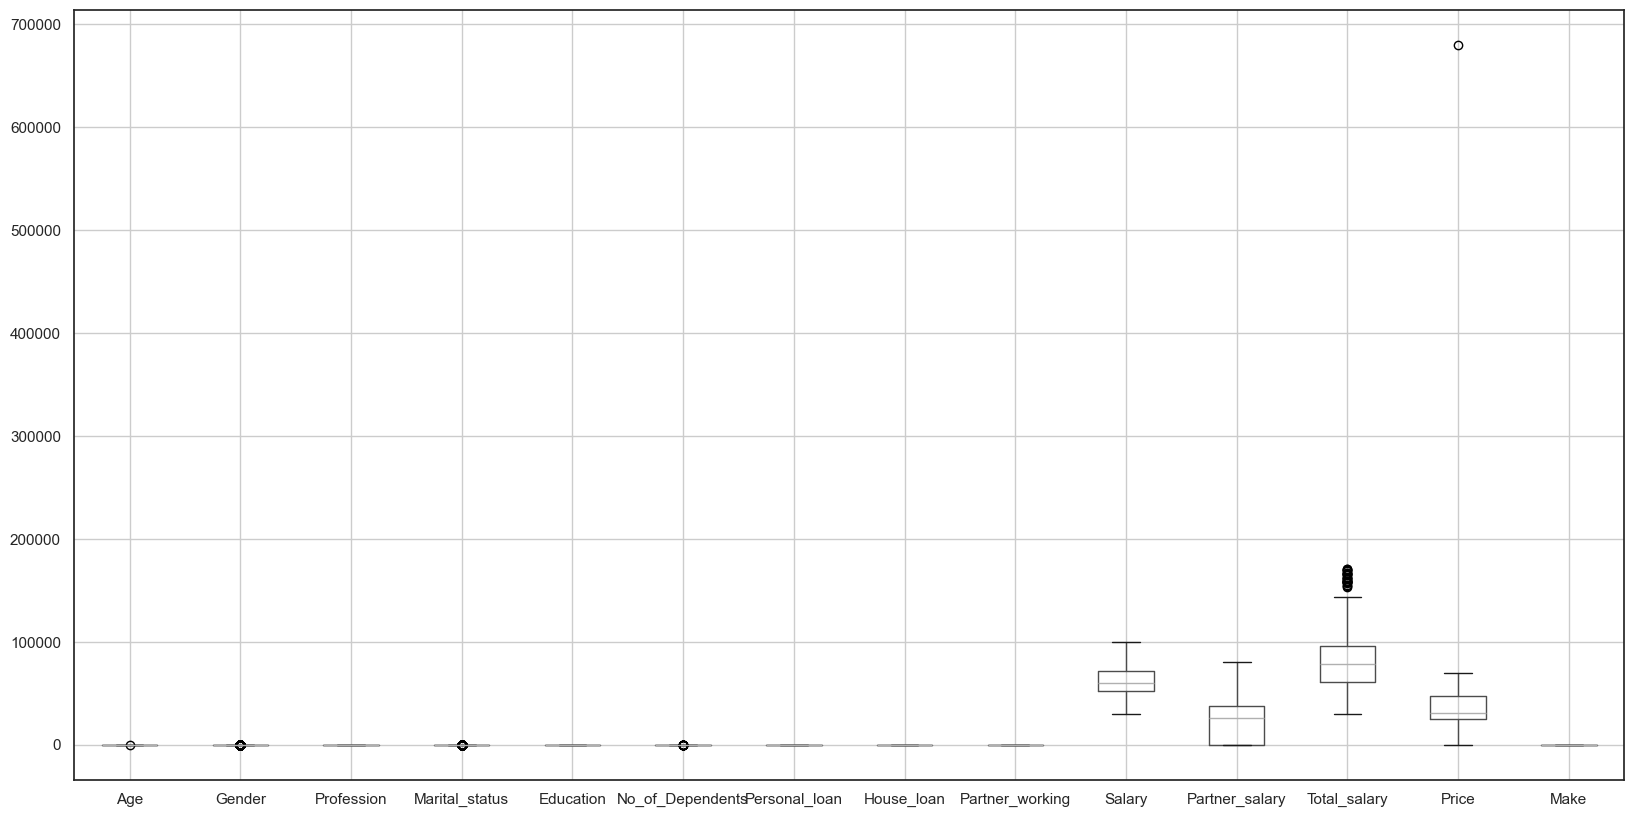

In [501]:
plt.figure(figsize=(20,10))
df.boxplot()
plt.show()

#### Like we can see **Total_salary** has some outliers, we can try and impute it using z-score or IQR <br> and In extreme cases drop the tuple all together

In [502]:
Q1 = df['Total_salary'].quantile(0.25)
Q3 = df['Total_salary'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
df_iqr = df[(df['Total_salary'] >= lower_bound) & (df['Total_salary'] <= upper_bound)]
print(f"Rows after IQR outlier removal: {df_iqr.shape[0]}")
df = df_iqr
df_iqr['Total_salary'].describe()

Rows after IQR outlier removal: 1554


count      1554.000000
mean      78189.253539
std       23292.262623
min       30000.000000
25%       60200.000000
50%       77500.000000
75%       95050.000000
max      143100.000000
Name: Total_salary, dtype: float64

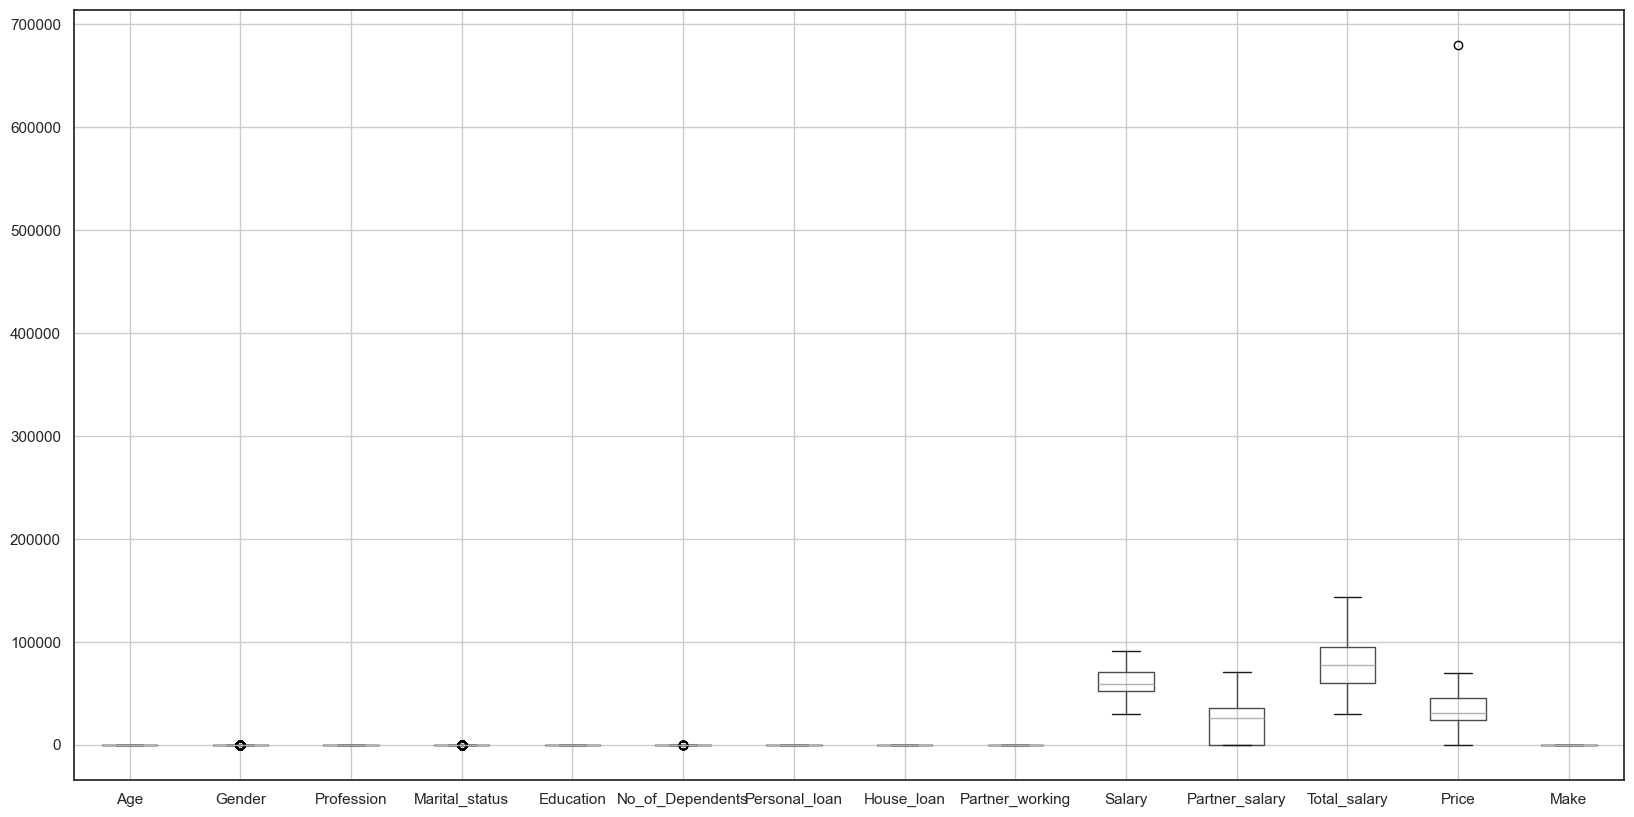

In [503]:
plt.figure(figsize=(20,10))
df.boxplot()
plt.show()

### Multi - Variate Analysis -

#### Correlation Matrix -

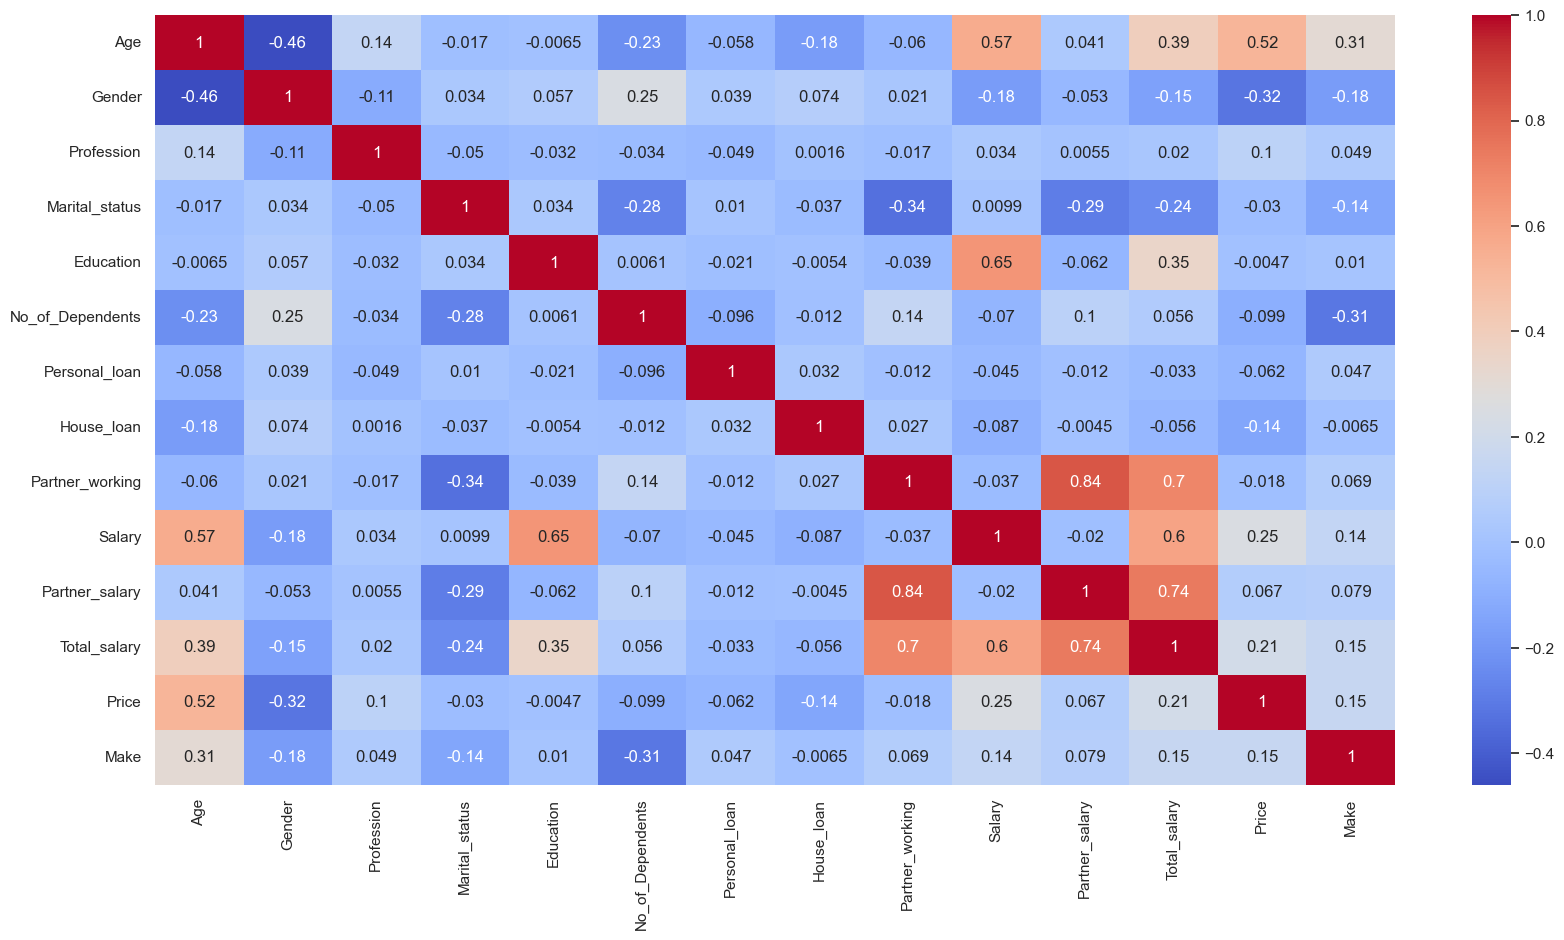

In [504]:
sns.heatmap(df.corr(), cmap = "coolwarm", annot=True)
plt.show()

## Descriptive Statistics -
### What are the mean, median, and standard deviation of the ages of individuals in the dataset?

In [505]:
mean = df['Age'].sum()/df.shape[0]
mean

np.float64(31.61003861003861)

In [506]:
median = df['Age'].median()
median

29.0

In [507]:
std = df['Age'].std()
std

8.185615648199034

## Data Distribution -
### What is the distribution of gender in the dataset? Represent it using a pie chart.

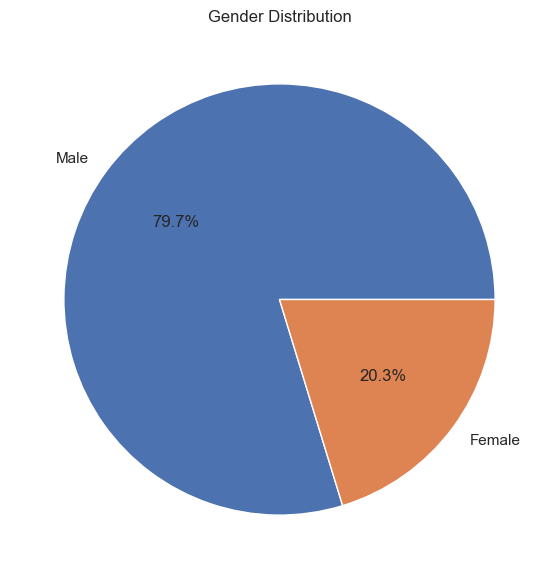

In [508]:
plt.figure(figsize=(7,7))
gender_counts = df['Gender'].value_counts()

plt.pie(gender_counts, labels=['Male','Female'], autopct='%1.1f%%')
plt.title('Gender Distribution')
plt.show()

## Correlation Analysis -
### Is there a correlation between age and salary? Provide the correlation coefficient and interpret the result.

In [509]:
temp_df = df[['Age', 'Salary']]

In [510]:
temp_df

,Age,Salary
3,53,72500.0
4,53,79700.0
5,53,79800.0
6,53,80900.0
7,52,79100.0
...,...,...
1576,22,33300.0
1577,22,32000.0
1578,22,32900.0
1579,22,32200.0


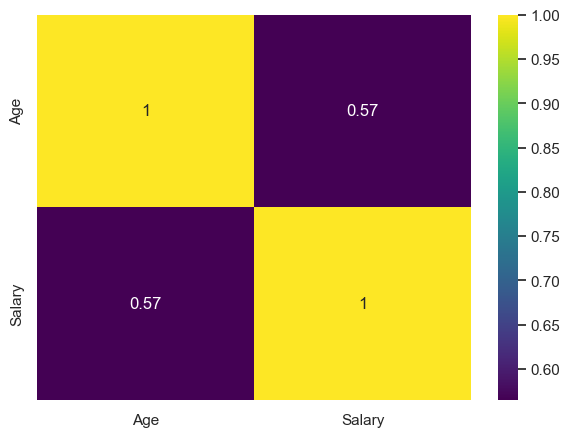

In [511]:
plt.figure(figsize=(7,5))
sns.heatmap(temp_df.corr(), annot=True, cmap="viridis")
plt.show()

## Salary Analysis -
### What is the average salary for individuals based on their educational qualifications (Graduate vs. Post Graduate)?

In [512]:
df

,Age,Gender,Profession,Marital_status,Education,No_of_Dependents,Personal_loan,House_loan,Partner_working,Salary,Partner_salary,Total_salary,Price,Make
3,53,0,1,0,0,2.0,1,0,1,72500.0,70300.0,142800,61000,0
4,53,1,1,0,1,3.0,0,0,1,79700.0,60200.0,139900,57000,2
5,53,0,1,0,1,3.0,0,0,1,79800.0,60500.0,140300,57000,2
6,53,0,1,0,1,3.0,1,0,1,80900.0,50800.0,131700,51000,2
7,52,1,1,0,0,4.0,0,0,1,79100.0,40400.0,119500,68000,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1576,22,1,1,1,0,2.0,0,1,0,33300.0,0.0,33300,27000,1
1577,22,1,0,0,0,4.0,0,0,0,32000.0,25600.0,32000,31000,1
1578,22,1,0,1,0,2.0,0,1,0,32900.0,0.0,32900,30000,1
1579,22,1,0,0,0,3.0,1,1,0,32200.0,25600.0,32200,24000,1


In [513]:
avg_post_grad_salary = df[df['Education'] == 1]['Age'].mean()
avg_grad_salary = df[df['Education'] == 0]['Age'].mean()

In [514]:
print(avg_post_grad_salary, avg_grad_salary)

31.568464730290458 31.677966101694917


## Loan Analysis -
### What percentage of individuals have taken a personal loan? How does this compare between males and females?

In [515]:
loans = df[df["Personal_loan"] == 1]
no_loans = df[df["Personal_loan"] == 0]

In [516]:
f'{len(loans)/len(df)*100}%'

'50.51480051480052%'

In [517]:
f'{len(no_loans)/len(df)*100}%'

'49.48519948519948%'

In [518]:
# Men vs Women - 
men_loans = loans[loans['Gender'] == 1]
women_loans = loans[loans['Gender'] == 0]

men_no_loans = no_loans[no_loans['Gender'] == 1]
women_no_loans = no_loans[no_loans['Gender'] == 0]

In [519]:
len(men_loans)/len(loans)*100

81.27388535031848

In [520]:
len(women_loans)/len(loans)*100

18.726114649681527

In [521]:
len(men_no_loans)/len(no_loans)*100

78.15344603381014

In [522]:
len(women_no_loans)/len(no_loans)*100

21.84655396618986

## Marital Status and Dependents -
### What is the average number of dependents for married individuals versus single individuals?

In [523]:
df

,Age,Gender,Profession,Marital_status,Education,No_of_Dependents,Personal_loan,House_loan,Partner_working,Salary,Partner_salary,Total_salary,Price,Make
3,53,0,1,0,0,2.0,1,0,1,72500.0,70300.0,142800,61000,0
4,53,1,1,0,1,3.0,0,0,1,79700.0,60200.0,139900,57000,2
5,53,0,1,0,1,3.0,0,0,1,79800.0,60500.0,140300,57000,2
6,53,0,1,0,1,3.0,1,0,1,80900.0,50800.0,131700,51000,2
7,52,1,1,0,0,4.0,0,0,1,79100.0,40400.0,119500,68000,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1576,22,1,1,1,0,2.0,0,1,0,33300.0,0.0,33300,27000,1
1577,22,1,0,0,0,4.0,0,0,0,32000.0,25600.0,32000,31000,1
1578,22,1,0,1,0,2.0,0,1,0,32900.0,0.0,32900,30000,1
1579,22,1,0,0,0,3.0,1,1,0,32200.0,25600.0,32200,24000,1


In [524]:
dependents_married = df[df['Marital_status'] == 0]['No_of_Dependents']
dependents_unmarried = df[df['Marital_status'] == 1]['No_of_Dependents']


In [525]:
f"Avg married dependents: {dependents_married.sum()/len(dependents_married)}"

'Avg married dependents: 2.526129943502825'

In [526]:
f"Avg unmarried dependents: {dependents_unmarried.sum()/len(dependents_unmarried)}"

'Avg unmarried dependents: 1.608695652173913'

# Splitting the dataset -

### Creating the Features and Target Variable -

In [527]:
X = df.drop('Price', axis = 1).drop('Make', axis = 1)
y = df['Price']

In [528]:
X.head()

,Age,Gender,Profession,Marital_status,Education,No_of_Dependents,Personal_loan,House_loan,Partner_working,Salary,Partner_salary,Total_salary
3,53,0,1,0,0,2.0,1,0,1,72500.0,70300.0,142800
4,53,1,1,0,1,3.0,0,0,1,79700.0,60200.0,139900
5,53,0,1,0,1,3.0,0,0,1,79800.0,60500.0,140300
6,53,0,1,0,1,3.0,1,0,1,80900.0,50800.0,131700
7,52,1,1,0,0,4.0,0,0,1,79100.0,40400.0,119500


In [529]:
y.head()

3    61000
4    57000
5    57000
6    51000
7    68000
Name: Price, dtype: int64

In [530]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True, random_state=42)

# Training a Linear Regressor -

In [531]:
model = LinearRegression()

In [532]:
model.fit(X_train, y_train)

LinearRegression()

# Evaluating the model on the test data -

In [533]:
y_pred = model.predict(X_test)

### 1. R2 Score -

In [534]:
r2_score(y_test, y_pred)

0.6641936246747187

### 2. MSE -

In [535]:
mean_squared_error(y_test, y_pred)

63165470.49173338

### 3. RMSE -

In [536]:
root_mean_squared_error(y_test, y_pred)

7947.670758891147

### 4. MAE -

In [537]:
mean_absolute_error(y_test, y_pred)

6096.8790938617085

## Plotting the line of regression -

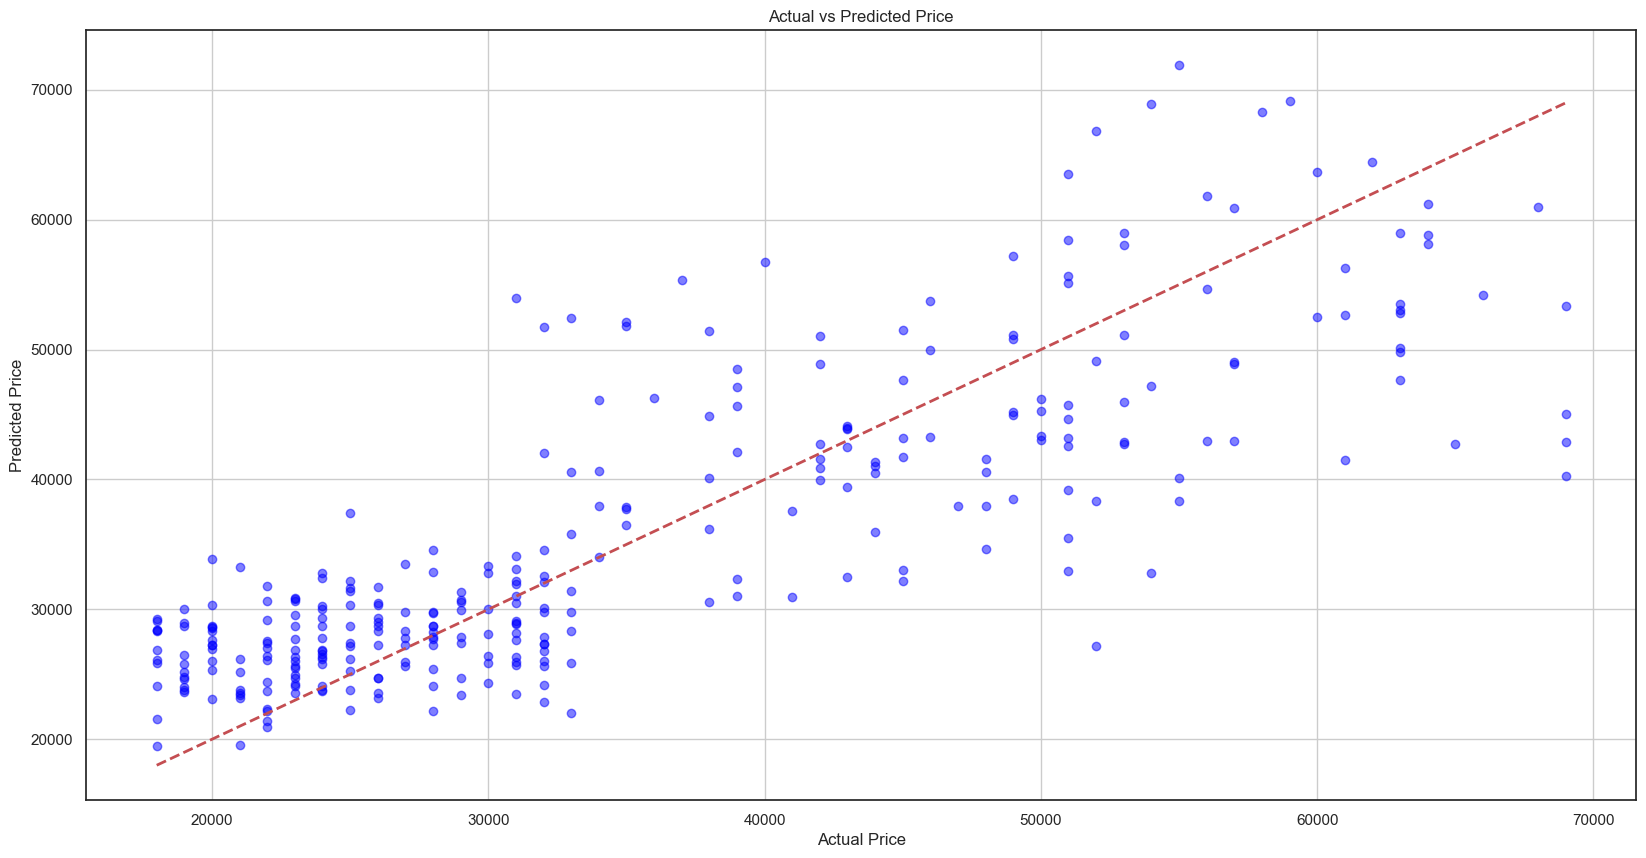

In [538]:
plt.scatter(y_test, y_pred,color = 'blue', alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted Price")
plt.grid(True)
plt.show()

## Training a Classifier to Predict the make of the car the consumer is most likely to purchase

In [539]:
X = df.drop('Price', axis = 1).drop('Make', axis = 1)
y = df['Make']

In [540]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, shuffle=True, random_state=42)

In [541]:
classifier = LogisticRegression()

In [542]:
classifier.fit(X_train, y_train)

LogisticRegression()

In [543]:
y_pred2 = classifier.predict(X_test)

In [544]:
accuracy_score(y_test, y_pred2)

0.4318766066838046

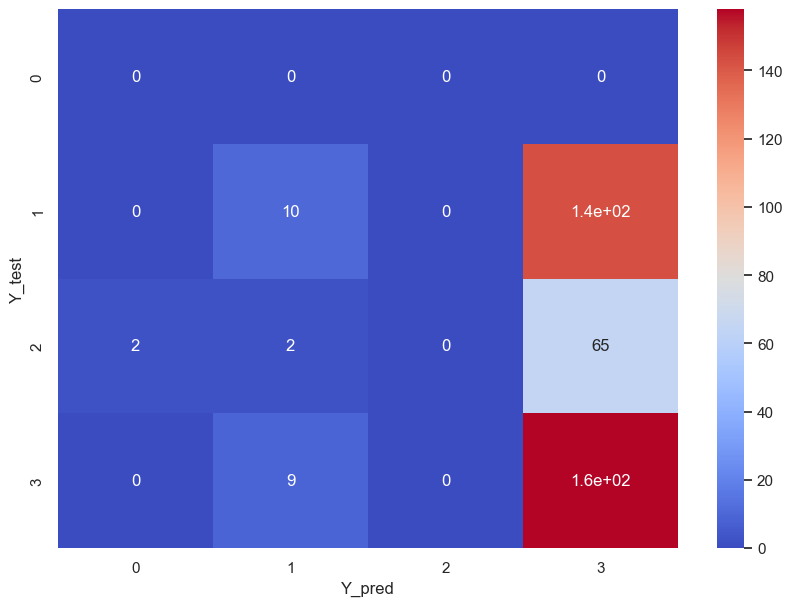

In [545]:
plt.figure(figsize=(10,7))
sns.heatmap(confusion_matrix(y_test, y_pred2), cmap='coolwarm', annot = True)
plt.xlabel('Y_pred')
plt.ylabel('Y_test')
plt.show()